# Compras_2021 y Compras_2022

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Datasets de venta de productos al publico 2021-2022
compras_2021_2022= pd.read_csv("coste_compra_2021_2022.csv")
compras_2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111268 entries, 0 to 111267
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_producto         111268 non-null  float64
 1   Nombre_producto     111268 non-null  object 
 2   Categoria_producto  111268 non-null  object 
 3   Tipo_producto       111268 non-null  object 
 4   Proveedor_producto  111268 non-null  object 
 5   Fecha_compra        111268 non-null  object 
 6   Coste_compra        111268 non-null  float64
 7   Año_compra          111268 non-null  int64  
 8   Mes_compra          111268 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.6+ MB


In [3]:
compras_2021_2022.isnull().sum()

ID_producto           0
Nombre_producto       0
Categoria_producto    0
Tipo_producto         0
Proveedor_producto    0
Fecha_compra          0
Coste_compra          0
Año_compra            0
Mes_compra            0
dtype: int64

In [4]:
compras_2021_2022.dtypes

ID_producto           float64
Nombre_producto        object
Categoria_producto     object
Tipo_producto          object
Proveedor_producto     object
Fecha_compra           object
Coste_compra          float64
Año_compra              int64
Mes_compra              int64
dtype: object

## Convertimos cada columna a su determinado tipo de dato antes de hacer el merge

In [5]:
compras_2021_2022.ID_producto = compras_2021_2022.ID_producto.astype('object')
compras_2021_2022.Fecha_compra = compras_2021_2022.Fecha_compra.astype('datetime64[ns]')
compras_2021_2022['Mes_compra'] = compras_2021_2022['Mes_compra'].astype('int')
compras_2021_2022['Año_compra'] = compras_2021_2022['Año_compra'].astype('int')
compras_2021_2022[['ID_producto','Año_compra', 'Mes_compra','Fecha_compra']].head(5)

,ID_producto,Año_compra,Mes_compra,Fecha_compra
0,1637.0,2022,6,2022-06-29 21:10:50
1,1637.0,2022,6,2022-06-29 20:25:26
2,597.0,2022,6,2022-06-29 19:22:59
3,1252.0,2022,6,2022-06-29 19:22:59
4,877.0,2022,6,2022-06-29 19:22:59


In [6]:
compras_2021_2022.dtypes

ID_producto                   object
Nombre_producto               object
Categoria_producto            object
Tipo_producto                 object
Proveedor_producto            object
Fecha_compra          datetime64[ns]
Coste_compra                 float64
Año_compra                     int64
Mes_compra                     int64
dtype: object

In [7]:
df= compras_2021_2022
df

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
0,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 21:10:50,0.15,2022,6
1,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 20:25:26,0.15,2022,6
2,597.0,Fuet extra Biobardales 200 gr,Resto Producto Fresco / Charcutería animal / E...,Eco,(BIOBARDALES) COMERCIAL BELDREA S.L.,2022-06-29 19:22:59,2.95,2022,6
3,1252.0,"Preparado para legumbres chorizo, morcilla, pa...",Resto Producto Fresco / Charcutería animal / E...,Eco,(BIOBARDALES) COMERCIAL BELDREA S.L.,2022-06-29 19:22:59,2.90,2022,6
4,877.0,Lomo extra lonchas Biobardales 100 gr,Resto Producto Fresco / Charcutería animal / E...,Eco,(BIOBARDALES) COMERCIAL BELDREA S.L.,2022-06-29 19:22:59,3.45,2022,6
...,...,...,...,...,...,...,...,...,...
111263,2602.0,Pan levain La miguiña 1 kg,Resto Producto Fresco / Panadería y bollería s...,Convencional,(LA MIGUIÑA) LA MIGUIÑA S.L.,2021-01-02 08:33:16,3.30,2021,1
111264,2600.0,Chapata La miguiña 1 Kg,Resto Producto Fresco / Panadería y bollería s...,Convencional,(LA MIGUIÑA) LA MIGUIÑA S.L.,2021-01-02 08:33:16,2.80,2021,1
111265,3733.0,Copos 5 cereales bio El Granero Integral 500 gr,Seco Envasado / Desayunos y merienda / Cereales,Eco,(BIOGRAN) BIOGRAN S.L.,2021-01-01 12:23:33,1.37,2021,1
111266,3732.0,Copos amaranto bio El Granero Integral 250 gr,Seco Envasado / Cereales y semillas / Cereales,Eco,(BIOGRAN) BIOGRAN S.L.,2021-01-01 12:22:37,2.21,2021,1


In [8]:
df.isnull().sum()

ID_producto           0
Nombre_producto       0
Categoria_producto    0
Tipo_producto         0
Proveedor_producto    0
Fecha_compra          0
Coste_compra          0
Año_compra            0
Mes_compra            0
dtype: int64

### Vamos a observar los valores o categorías únicas por cada columna categórica:

In [9]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))

ID_producto --------------------------> 4723
Nombre_producto --------------------------> 4676
Categoria_producto --------------------------> 131
Tipo_producto --------------------------> 3
Proveedor_producto --------------------------> 127
Fecha_compra --------------------------> 9026
Coste_compra --------------------------> 1373
Año_compra --------------------------> 2
Mes_compra --------------------------> 12


In [10]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra'],
      dtype='object')

### Vamos a evaluar la clasificacion de los productos comprados y vendidos en el supermercado:
* **Tipo de producto** : Es el tipo de empaque del producto, ya sea *ecológico* o *convencional*.
* **Categoria de producto**: Se refiere a la categoría del producto de cara al público.
* **Proveedor de producto**. Se refiere al proveedor del producto, es decir a quién se le compró el producto.

### Vamos a organizar el dataframe por orden alfabético de las `Categoria_producto`

In [11]:
df = df.sort_values("Categoria_producto")

In [12]:
#Reseteamos el index
df = df.reset_index()
df

,index,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
0,59820,4721.0,AJUSTE 31/12/20,All,False,False,2021-05-24 14:49:31,0.00,2021,5
1,96843,4721.0,AJUSTE 31/12/20,All,False,False,2021-05-24 14:49:31,0.00,2021,5
2,68424,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2021-03-02 10:50:28,1.93,2021,3
3,92842,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2021-06-30 12:39:10,1.93,2021,6
4,103931,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-03-16 19:45:38,2.19,2021,3
...,...,...,...,...,...,...,...,...,...,...
111263,8649,3383.0,Zumo mediterráneo Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-04-11 16:15:10,1.69,2022,4
111264,8650,3382.0,Zumo tropical Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-04-11 16:15:10,1.69,2022,4
111265,8651,3378.0,Zumo de naranja Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-04-11 16:15:10,1.66,2022,4
111266,88383,1597.0,Zumo de tomate Cal valls 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(ALTERNATUR) ALTERNATUR S.L.,2021-09-01 14:15:33,1.65,2021,9


In [13]:
df.columns

Index(['index', 'ID_producto', 'Nombre_producto', 'Categoria_producto',
       'Tipo_producto', 'Proveedor_producto', 'Fecha_compra', 'Coste_compra',
       'Año_compra', 'Mes_compra'],
      dtype='object')

In [14]:
#Borramos la antigua columna de index
df=df.drop(['index'], axis=1)
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra'],
      dtype='object')

## Tipo de producto

In [15]:
df['Tipo_producto'].value_counts().unique().tolist()

[78264, 31745, 1259]

In [16]:
df.groupby(['Tipo_producto']).size().sort_values()

Tipo_producto
False            1259
Convencional    31745
Eco             78264
dtype: int64

#### Tenemos un total de:
* 78.264 productos--->  *eco*, 
* 31.745 productos ---> *convencionales*,  y 
* 1.259 productos ---> con *False* que se les debe reasignar un `Tipo_producto`.

In [17]:
df.groupby('Tipo_producto').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_57208/1425067881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Tipo_producto').sum()


,Coste_compra,Año_compra,Mes_compra
Tipo_producto,,,
Convencional,81580.81,64167426,206512
Eco,241699.63,158197230,504799
False,6460.48,2545194,10037


In [18]:
df.Tipo_producto.unique().tolist()

['False', 'Convencional', 'Eco']

### Vamos a ver que productos son catalogados como `Eco`

In [19]:
df.loc[df["Tipo_producto"] == "Eco"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
4,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-03-16 19:45:38,2.19,2021,3
6,2743.0,Papel cocina compacto 100% fibra reciclada Eco...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.,2022-06-17 13:44:15,1.62,2022,6
7,2721.0,Esponja estropajo Ecodoo 2 uds,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.,2022-06-17 13:44:15,1.16,2022,6
8,2743.0,Papel cocina compacto 100% fibra reciclada Eco...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.,2021-09-08 14:03:06,1.85,2021,9
11,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-04-09 18:56:51,2.19,2021,4
...,...,...,...,...,...,...,...,...,...
111263,3383.0,Zumo mediterráneo Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-04-11 16:15:10,1.69,2022,4
111264,3382.0,Zumo tropical Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-04-11 16:15:10,1.69,2022,4
111265,3378.0,Zumo de naranja Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-04-11 16:15:10,1.66,2022,4
111266,1597.0,Zumo de tomate Cal valls 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(ALTERNATUR) ALTERNATUR S.L.,2021-09-01 14:15:33,1.65,2021,9


### Vamos a ver que productos son catalogados como `Convencional`

In [20]:
df.loc[df["Tipo_producto"] == "Convencional"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2021-03-02 10:50:28,1.93,2021,3
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2021-06-30 12:39:10,1.93,2021,6
5,3115.0,Papel de cocina maxirollo Mical 2 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-05-13 13:21:20,0.81,2021,5
9,3626.0,Escoba bicolor Mical,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-02-02 07:29:43,1.38,2021,2
10,3166.0,Spray limpiabaños Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-06-09 13:39:26,0.95,2022,6
...,...,...,...,...,...,...,...,...,...
111209,3909.0,Bebida tropical con zumo y leche Bifrutas 6x20...,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-01-29 13:46:10,1.35,2021,1
111213,3907.0,Néctar de melocotón Granini 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-01-29 13:46:10,1.42,2021,1
111219,3908.0,Néctar de naranja Granini 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-01-29 13:46:10,1.30,2021,1
111246,2793.0,Zumo manzana brick Gourmet 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-01-27 20:21:24,0.55,2021,1


### Vamos a ver que productos son catalogados como False

In [24]:
product_false=df.loc[df['Tipo_producto'] == 'False']
product_false.sort_values(by='ID_producto')

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
47688,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",False,False,2021-02-12 12:06:18,1.33,2021,2
45556,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",False,False,2021-02-12 12:06:18,1.33,2021,2
66273,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2022-04-05 12:55:15,4.82,2022,4
66377,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2022-08-10 10:00:03,4.82,2022,8
66547,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2021-12-04 09:47:11,4.72,2021,12
...,...,...,...,...,...,...,...,...,...
90469,6460.0,"Crema chocolate negro, avellanas y café arábic...",Seco Envasado / Dulces y repostería / Chocolate,False,(Chocolates artesanos Isabel) ISABEL FELEZ ROS...,2022-12-02 11:42:41,3.50,2022,12
6449,6475.0,Lapiz ojos fougere 04 Copinesline,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",False,(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.,2022-11-30 17:33:43,4.95,2022,11
6492,6481.0,Lapiz labios beige 04 Copinesline,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",False,(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.,2022-11-30 17:33:43,6.95,2022,11
6292,6483.0,Lapiz labios nude 02 Copinesline,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",False,(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.,2022-11-30 17:33:43,6.95,2022,11


### Hay un total de 1259 tipos de productos False, que hay que evaluar a que tipo de producto corresponde:

* Eco
* Convencional

## Plantear una tuberia (pipeline) para formatear los datos, determinar los paso a pasos de manipulacion de datos ---> Data Quality

* Chequeo general para que los datos queden comparables y con calidad media para su posterior análisis.

* Recomendaciones para mejorar la calidad de los datos

* Señalar que hay ciertos problemas de data quality y en que tipo de categorias y categorias del producto.

### Se decide catalogar estos 1259 registros de `False` como `Convencional`

In [22]:
df.groupby(['Tipo_producto']).size().sort_values()

Tipo_producto
False            1259
Convencional    31745
Eco             78264
dtype: int64

In [27]:
#Seleccionamos una fila para revisar que el cambio se haga correctamente
df.iloc[[47688, 45556,66273]]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
47688,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",False,False,2021-02-12 12:06:18,1.33,2021,2
45556,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",False,False,2021-02-12 12:06:18,1.33,2021,2
66273,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2022-04-05 12:55:15,4.82,2022,4


####  Utilizaremos el método numpy.where() para reemplazar esos valores en la columna `Tipo_producto` y cambiarlos por tipo de producto `Convencional`

In [28]:
df['Tipo_producto'] = np.where((df.Tipo_producto == "False"), 'Convencional', df.Tipo_producto)

#### Chequeamos los cambios realizados en `Tipo_producto`

In [29]:
#Seleccionamos una fila para revisar que el cambio se haga correctamente
df.iloc[[47688, 45556,66273]]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
47688,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",Convencional,False,2021-02-12 12:06:18,1.33,2021,2
45556,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",Convencional,False,2021-02-12 12:06:18,1.33,2021,2
66273,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,Convencional,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2022-04-05 12:55:15,4.82,2022,4


In [30]:
df.groupby(['Tipo_producto']).size().sort_values()

Tipo_producto
Convencional    33004
Eco             78264
dtype: int64

#### Revisamos que los `Tipo_producto` quedan en dos clasificaciones:`Eco` y `Convencional`

#### Vamos a ver estos tipos de productos graficamente

In [177]:
def annot_plot(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False) 
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

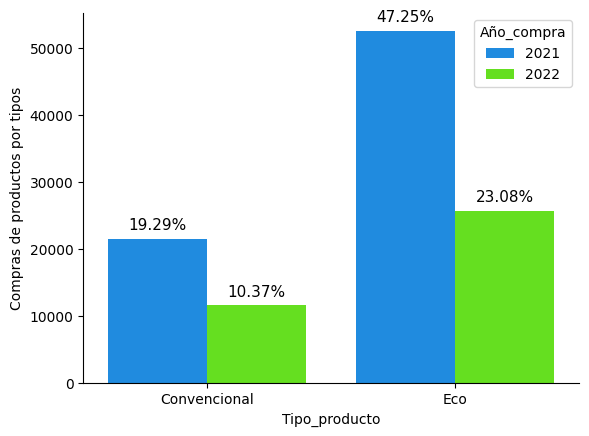

In [32]:
ax = sns.countplot(x="Tipo_producto",data=df, palette="gist_rainbow_r", hue="Año_compra")
plt.ylabel("Compras de productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

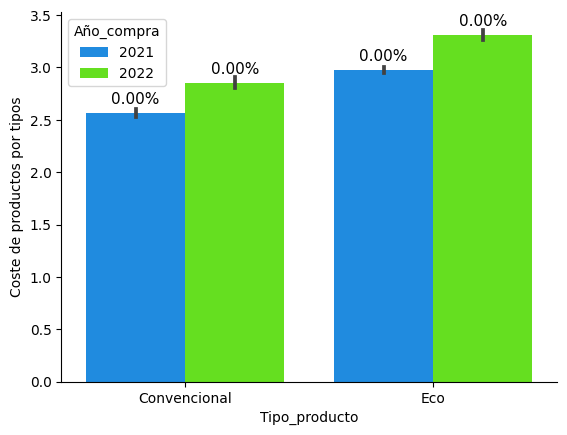

In [37]:
ax = sns.barplot(x="Tipo_producto",y="Coste_compra", data=df, palette="gist_rainbow_r", hue="Año_compra")
plt.ylabel("Coste de productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

### Categorías de producto

In [38]:
df.Categoria_producto.unique().tolist()

['All',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Acccesorios de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Insecticidas',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Jabón y detergente',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Productos de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Protección del alimento',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene bucal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene corporal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene íntima',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Limpiacalzado',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Pilas',
 'Droguería, Perfumería, Limpieza, Hig

In [39]:
df.groupby(['Categoria_producto']).size().sort_values()

Categoria_producto
All                                                                                                 2
Seco Envasado / Alimentación e higiene infantil / Infusiones                                        3
Granel / Granel salado / Pastas y sémolas                                                           4
Granel / Granel droguería, perfumería, limpieza, higiene y hogar / Higiene – Higiene corporal       5
Fruta y Verdura / Fruta / Otras frutas                                                              5
                                                                                                 ... 
Fruta y Verdura / Fruta / Fruta de pepita                                                        3473
Seco Envasado / Panes, harinas / Panes industriales                                              4071
Resto Producto Fresco / Leche, zumos, productos lácteos / Yogures y postres                      6830
Resto Producto Fresco / Panadería y bollería salada / Pan      

#### Tenemos un total de **131** categorias de productos.

Son extrañas las categorias:

* all
* error 

#### Evaluemos que productos hay en estas categorías extrañas:


In [40]:
df.loc[df["Categoria_producto"] == "All"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
0,4721.0,AJUSTE 31/12/20,All,Convencional,False,2021-05-24 14:49:31,0.0,2021,5
1,4721.0,AJUSTE 31/12/20,All,Convencional,False,2021-05-24 14:49:31,0.0,2021,5


### Borraremos estas dos filas que son error de la desgrada de los datos del software propio del supermercado

### Se eliminan las dos filas con la categoría `All`

In [41]:
df= df.drop([0, 1],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111266 entries, 2 to 111267
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID_producto         111266 non-null  object        
 1   Nombre_producto     111266 non-null  object        
 2   Categoria_producto  111266 non-null  object        
 3   Tipo_producto       111266 non-null  object        
 4   Proveedor_producto  111266 non-null  object        
 5   Fecha_compra        111266 non-null  datetime64[ns]
 6   Coste_compra        111266 non-null  float64       
 7   Año_compra          111266 non-null  int64         
 8   Mes_compra          111266 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.6+ MB


### Ahora vamos a ver los productos categorizados como `Error`y decidir que hacer con ellos.


In [43]:
categoria_error=df.loc[df["Categoria_producto"] == "Error"]
categoria_error

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
6521,4314.0,Lubina con langostino. 330gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:50:21,6.65,2021,3
6522,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.40,2021,3
6523,4312.0,Trucha al natural. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.25,2021,3
6524,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.90,2021,3
6525,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:48:08,5.90,2021,3
6526,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.40,2021,3
6527,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:48:08,5.90,2021,3
6528,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:41:30,5.40,2021,3
6529,4314.0,Lubina con langostino. 330gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,6.65,2021,3
6530,4312.0,Trucha al natural. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:45:52,5.25,2021,3


In [44]:
categoria_error.shape

(16, 9)

### Tenemos 16 filas de productos categorizados como Error, y son productos de pescado, no sé si es pescado fresco o envasado.

### Vamos a etiquetar los productos de `Error`dentro de la categoría `Resto Producto Fresco / Pescados y mariscos / Pescado fresco`---> revisar si es adecuada esta categoría para estos productos.

####  Utilizaremos el método numpy.where() para reemplazar esos valores en la columna `Categoria_producto` y cambiarlos por tipo de producto `Resto Producto Fresco / Pescados y mariscos / Pescado fresco`

In [45]:
df['Categoria_producto'] = np.where((df.Categoria_producto == "Error"), 'Resto Producto Fresco / Pescados y mariscos / Pescado fresco', df.Categoria_producto)

#### Chequeamos los cambios realizados en `Categoria_producto`

In [46]:
#Seleccionamos una fila para revisar que el cambio se haga correctamente
df.iloc[6521:6537]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra
6523,4312.0,Trucha al natural. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.25,2021,3
6524,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.90,2021,3
6525,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:48:08,5.90,2021,3
6526,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.40,2021,3
6527,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:48:08,5.90,2021,3
6528,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:41:30,5.40,2021,3
6529,4314.0,Lubina con langostino. 330gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,6.65,2021,3
6530,4312.0,Trucha al natural. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:45:52,5.25,2021,3
6531,4314.0,Lubina con langostino. 330gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,6.65,2021,3
6532,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.90,2021,3


### Chequeamos como quedan las `Categoria_producto`

In [47]:
df.Categoria_producto.unique().tolist()

['Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Acccesorios de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Insecticidas',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Jabón y detergente',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Productos de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Protección del alimento',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene bucal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene corporal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene íntima',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Limpiacalzado',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Pilas',
 'Droguería, Perfumería, Limpieza, Higiene, Ho

### Se determinaran 6 categorias principales de acuerdo a la primera palabra de las categorias

In [138]:
def tomar_primera_palabra(cadena):
    return cadena.split("")[0]

# aplica la función a la columna "Categoria_producto" del DataFrame
nueva_columna = df['Categoria_producto'].apply(tomar_primera_palabra)

# asigna los valores de la nueva columna a la columna "categoria_principal" del DataFrame
df['Categoria_principal'] = nueva_columna

df['Categoria_principal']

ValueError: empty separator

In [134]:
df['Categoria_principal'].unique().tolist()

['Droguería, Perfumería, Limpieza, Higiene, Hogar ',
 'Resto Producto Fresco ',
 'Fruta y Verdura',
 'Fruta y Verdura ',
 'Granel ',
 'Librería',
 'Seco Envasado ']

In [51]:
df.head(5)

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Categoria_principal
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2021-03-02 10:50:28,1.93,2021,3,"Droguería,"
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2021-06-30 12:39:10,1.93,2021,6,"Droguería,"
4,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-03-16 19:45:38,2.19,2021,3,"Droguería,"
5,3115.0,Papel de cocina maxirollo Mical 2 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-05-13 13:21:20,0.81,2021,5,"Droguería,"
6,2743.0,Papel cocina compacto 100% fibra reciclada Eco...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.,2022-06-17 13:44:15,1.62,2022,6,"Droguería,"


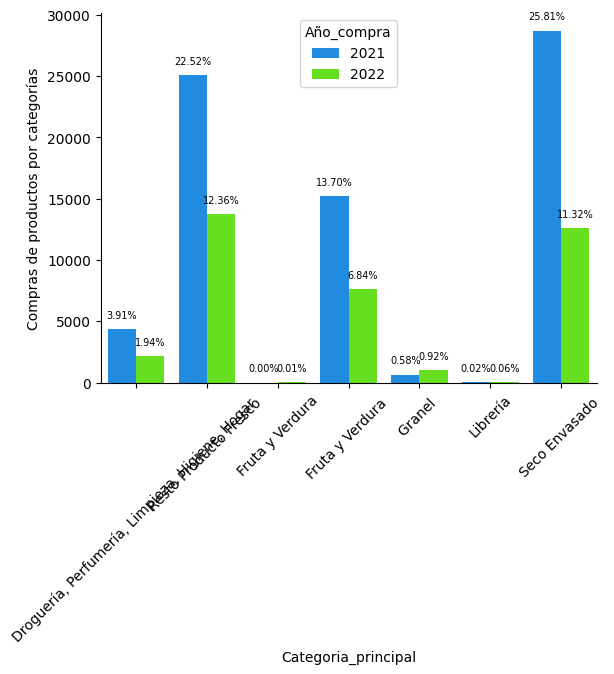

In [137]:
ax = sns.countplot(x="Categoria_principal",data=df, hue="Año_compra", palette="gist_rainbow_r")
plt.ylabel("Compras de productos por categorías")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=7,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.xticks(rotation=45)
plt.show()

### Proveedor de productos

In [52]:
df.groupby(['Proveedor_producto']).size().sort_values()

Proveedor_producto
(La Marea) MÁSPÚBLICO, SOCIEDAD COOPERATIVA                     1
(LARDUX FILMS) LARDUX FILMS, S.A.R.L.                           2
(CYCLO) CYCLO SOSTENIBLE S.L.                                   2
(Bodegas Tío Nicasio) VINOS CASTEJÓN S.L.                       3
(A PEIXEIRA) MARIA CARMEN HERMIDA DIAZ                          4
                                                            ...  
(PANADARÍO) DARÍO MARCOS GUINEA                              3450
(BIOGRAN) BIOGRAN S.L.                                       6092
(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOLOGICA S.L.     9125
(GM FOOD) TRANSGOURMET IBERICA, S.A.U.                      17374
(GUMENDI) GUMIEL Y MENDIA S.L.                              18882
Length: 127, dtype: int64

In [53]:
df.Proveedor_producto.unique().tolist()

['(DICHA & HECHO) ANA GUERRERO ALONSO',
 '(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.',
 '(GM FOOD) TRANSGOURMET IBERICA, S.A.U.',
 '(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.',
 '(BIOGRAN) BIOGRAN S.L.',
 '(Dietisur) DIETISUR S.L.',
 '(ALTERNATUR) ALTERNATUR S.L.',
 '(FRESCO) MARIA ESTHER SANCHEZ ROJO',
 '(BOLSAS VICENT) BOLSAS VICENT S.L.',
 '(GUMENDI) GUMIEL Y MENDIA S.L.',
 'False',
 '(CAMALOON) CAMALIZE S.L.',
 '(IDEAS) INICIATIVAS DE ECONOMIA ALTERNATIVA Y SOLIDARIA S.C.A.',
 '(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.',
 '(PIELSANA) PIELSANA S.COOP.MAD.',
 '(ACEITES VIZCÁNTAR) ACEITES VIZCÁNTAR S.L.U.',
 '(ECOEKO) ECOEKO COSMÉTICA CONSCIENTE S.L.',
 '(CYCLO) CYCLO SOSTENIBLE S.L.',
 '(ALIECO) ALIECO S.L.',
 '(EL LABRADOR) DISTRIBUCIONES DIETETICAS EL LABRADOR SL',
 '(EQUISALUD) EQUISALUD S.L.U.',
 '(NATURSOY) NUTRITION & SANTÉ IBERIA S.L.',
 '(IMPORECORD) IMPORECORD S.L.',
 '(CAJA CARTÓN EMBALAJE) SUR-INNOPACK S.L.',
 '(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO',
 '(BIOE

### Se determinaran 6 categorias principales de acuerdo a la primera palabra de las categorias

In [117]:
def tomar_primera_palabra(cadena):
    return cadena.split()[0]

# aplica la función a la columna "Categoria_producto" del DataFrame
nueva_columna = df['Proveedor_producto'].apply(tomar_primera_palabra)

# asigna los valores de la nueva columna a la columna "categoria_principal" del DataFrame
df['Proveedor'] = nueva_columna

df['Proveedor']

2               (DICHA
3               (DICHA
4             (BIOBIO)
5                  (GM
6             (BIOCOP)
              ...     
111263       (PIDEBIO)
111264       (PIDEBIO)
111265       (PIDEBIO)
111266    (ALTERNATUR)
111267       (GUMENDI)
Name: Proveedor, Length: 111266, dtype: object

In [118]:
df.head(5)

,ID_producto,Nombre_producto,Categoria_principal,Categoria_main_ID,Categoria_producto,Categoria_ID,Tipo_producto,Tipo_producto_ID,Proveedor_producto,Proveedor_ID,Coste_compra,Fecha_compra,Mes_compra,Año_compra,Proveedor
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,(DICHA & HECHO) ANA GUERRERO ALONSO,1,1.93,2021-03-02 10:50:28,3,2021,(DICHA
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,(DICHA & HECHO) ANA GUERRERO ALONSO,1,1.93,2021-06-30 12:39:10,6,2021,(DICHA
4,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Eco,2,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2,2.19,2021-03-16 19:45:38,3,2021,(BIOBIO)
5,3115.0,Papel de cocina maxirollo Mical 2 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",3,0.81,2021-05-13 13:21:20,5,2021,(GM
6,2743.0,Papel cocina compacto 100% fibra reciclada Eco...,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Eco,2,(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.,4,1.62,2022-06-17 13:44:15,6,2022,(BIOCOP)


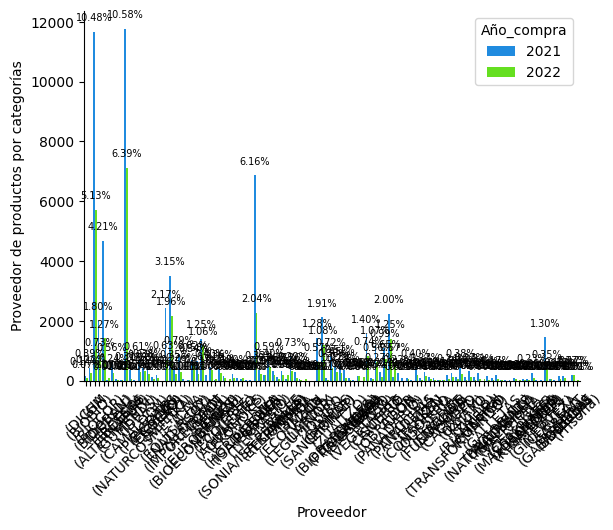

In [119]:
ax = sns.countplot(x="Proveedor",data=df, hue="Año_compra", palette="gist_rainbow_r")
plt.ylabel("Proveedor de productos por categorías")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=7,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.xticks(rotation=45)
plt.show()

### Tenemos un total de 130 proveedores de productos
* `false`--> reemplazar por su correcto proveedor


## Generaremos columnas nuevas con los ID para las tres categorias:`Tipo_producto`, `Categoria_producto`y `Proveedor_producto`

#### Generamos los codigos unicos para los Tipos de productos

In [54]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_Tipo_producto(categoria):
    if categoria not in generar_ID_Tipo_producto.codigos:
        generar_ID_Tipo_producto.codigos[categoria] = len(generar_ID_Tipo_producto.codigos) + 1
    return generar_ID_Tipo_producto.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_Tipo_producto.codigos = {}

# Creamos una nueva columna "Categoria_ID" en el dataframe
df["Tipo_producto_ID"] = df["Tipo_producto"].apply(generar_ID_Tipo_producto)

# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111266 entries, 2 to 111267
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID_producto          111266 non-null  object        
 1   Nombre_producto      111266 non-null  object        
 2   Categoria_producto   111266 non-null  object        
 3   Tipo_producto        111266 non-null  object        
 4   Proveedor_producto   111266 non-null  object        
 5   Fecha_compra         111266 non-null  datetime64[ns]
 6   Coste_compra         111266 non-null  float64       
 7   Año_compra           111266 non-null  int64         
 8   Mes_compra           111266 non-null  int64         
 9   Categoria_principal  111266 non-null  object        
 10  Tipo_producto_ID     111266 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 9.3+ MB


#### Chequeamos los codigos unicos para los Tipos de productos

In [55]:
df.Tipo_producto_ID.unique()

array([1, 2])

#### Generamos los codigos unicos para las Categorías de productos

In [56]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_categoria(categoria):
    if categoria not in generar_ID_categoria.codigos:
        generar_ID_categoria.codigos[categoria] = len(generar_ID_categoria.codigos) + 1
    return generar_ID_categoria.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_categoria.codigos = {}

# Creamos una nueva columna "Categoria_ID" en el dataframe
df["Categoria_ID"] = df["Categoria_producto"].apply(generar_ID_categoria)

# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111266 entries, 2 to 111267
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID_producto          111266 non-null  object        
 1   Nombre_producto      111266 non-null  object        
 2   Categoria_producto   111266 non-null  object        
 3   Tipo_producto        111266 non-null  object        
 4   Proveedor_producto   111266 non-null  object        
 5   Fecha_compra         111266 non-null  datetime64[ns]
 6   Coste_compra         111266 non-null  float64       
 7   Año_compra           111266 non-null  int64         
 8   Mes_compra           111266 non-null  int64         
 9   Categoria_principal  111266 non-null  object        
 10  Tipo_producto_ID     111266 non-null  int64         
 11  Categoria_ID         111266 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 10.2

#### Chequeamos los codigos unicos para los Categorías de productos

In [57]:
df.Categoria_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

#### Generamos los codigos unicos para las Categorías de productos

In [58]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_categoria_pral(categoria):
    if categoria not in generar_ID_categoria_pral.codigos:
        generar_ID_categoria_pral.codigos[categoria] = len(generar_ID_categoria_pral.codigos) + 1
    return generar_ID_categoria_pral.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_categoria_pral.codigos = {}

# Creamos una nueva columna "Categoria_ID" en el dataframe
df["Categoria_main_ID"] = df["Categoria_principal"].apply(generar_ID_categoria_pral)

# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111266 entries, 2 to 111267
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID_producto          111266 non-null  object        
 1   Nombre_producto      111266 non-null  object        
 2   Categoria_producto   111266 non-null  object        
 3   Tipo_producto        111266 non-null  object        
 4   Proveedor_producto   111266 non-null  object        
 5   Fecha_compra         111266 non-null  datetime64[ns]
 6   Coste_compra         111266 non-null  float64       
 7   Año_compra           111266 non-null  int64         
 8   Mes_compra           111266 non-null  int64         
 9   Categoria_principal  111266 non-null  object        
 10  Tipo_producto_ID     111266 non-null  int64         
 11  Categoria_ID         111266 non-null  int64         
 12  Categoria_main_ID    111266 non-null  int64         
dtypes: datetime64[

#### Chequeamos los codigos unicos para los Categorías de productos

In [59]:
df.Categoria_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

#### Generamos los codigos unicos para los Proveedores de productos

In [60]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_proveedor(categoria):
    if categoria not in generar_ID_proveedor.codigos:
        generar_ID_proveedor.codigos[categoria] = len(generar_ID_proveedor.codigos) + 1
    return generar_ID_proveedor.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_proveedor.codigos = {}

# Creamos una nueva columna "Proveedor_ID" en el dataframe
df["Proveedor_ID"] = df["Proveedor_producto"].apply(generar_ID_proveedor)


# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111266 entries, 2 to 111267
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID_producto          111266 non-null  object        
 1   Nombre_producto      111266 non-null  object        
 2   Categoria_producto   111266 non-null  object        
 3   Tipo_producto        111266 non-null  object        
 4   Proveedor_producto   111266 non-null  object        
 5   Fecha_compra         111266 non-null  datetime64[ns]
 6   Coste_compra         111266 non-null  float64       
 7   Año_compra           111266 non-null  int64         
 8   Mes_compra           111266 non-null  int64         
 9   Categoria_principal  111266 non-null  object        
 10  Tipo_producto_ID     111266 non-null  int64         
 11  Categoria_ID         111266 non-null  int64         
 12  Categoria_main_ID    111266 non-null  int64         
 13  Proveedor_ID  

#### Chequeamos los codigos unicos para los proveedores de productos

In [61]:
df.Proveedor_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [62]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra', 'Categoria_principal', 'Tipo_producto_ID', 'Categoria_ID',
       'Categoria_main_ID', 'Proveedor_ID'],
      dtype='object')

In [73]:
# Obtén una lista con los nombres de las columnas  y el orden que queremos que tengan en el DataFrame
orden_columnas = ['ID_producto', 'Nombre_producto', 
                  'Categoria_principal', 'Categoria_main_ID',
                  'Categoria_producto', 'Categoria_ID',
                  'Tipo_producto', 'Tipo_producto_ID',
                  'Proveedor_producto', 'Proveedor_ID',
                 'Coste_compra', 'Fecha_compra','Mes_compra','Año_compra'] 

In [74]:
# Reorganizamos el DataFrame 
df = df.reindex(columns=orden_columnas)
df.head(3)

,ID_producto,Nombre_producto,Categoria_principal,Categoria_main_ID,Categoria_producto,Categoria_ID,Tipo_producto,Tipo_producto_ID,Proveedor_producto,Proveedor_ID,Coste_compra,Fecha_compra,Mes_compra,Año_compra
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,(DICHA & HECHO) ANA GUERRERO ALONSO,1,1.93,2021-03-02 10:50:28,3,2021
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,(DICHA & HECHO) ANA GUERRERO ALONSO,1,1.93,2021-06-30 12:39:10,6,2021
4,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Eco,2,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2,2.19,2021-03-16 19:45:38,3,2021


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111266 entries, 2 to 111267
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID_producto          111266 non-null  object        
 1   Nombre_producto      111266 non-null  object        
 2   Categoria_principal  111266 non-null  object        
 3   Categoria_main_ID    111266 non-null  int64         
 4   Categoria_producto   111266 non-null  object        
 5   Categoria_ID         111266 non-null  int64         
 6   Tipo_producto        111266 non-null  object        
 7   Tipo_producto_ID     111266 non-null  int64         
 8   Proveedor_producto   111266 non-null  object        
 9   Proveedor_ID         111266 non-null  int64         
 10  Coste_compra         111266 non-null  float64       
 11  Fecha_compra         111266 non-null  datetime64[ns]
 12  Mes_compra           111266 non-null  int64         
 13  Año_compra    

# Visualizacion de los datos

## Aqui van los graficos que esta haciendo Jonathan --> Nos dividimos esta tarea el y yo ayer martes

In [76]:
#df['Fecha_compra'] = pd.to_datetime(df['Fecha_compra'])

<Axes: xlabel='Coste_compra', ylabel='Count'>

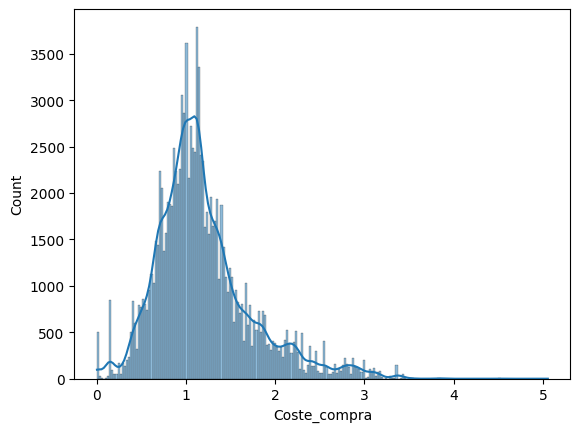

In [77]:
sns.histplot(np.log1p(df['Coste_compra']), kde=True)

<Axes: xlabel='Categoria_main_ID', ylabel='Count'>

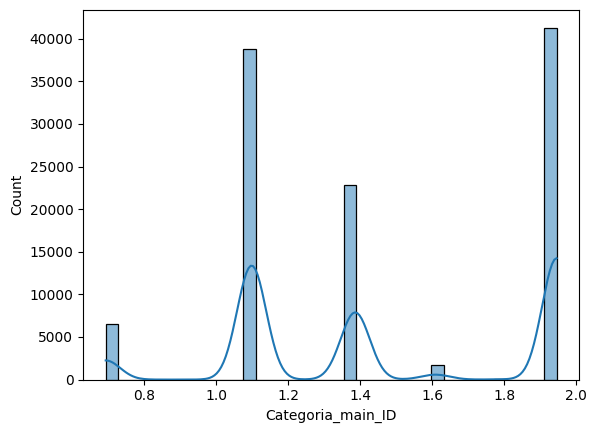

In [80]:
sns.histplot(np.log1p(df['Categoria_main_ID']), kde=True)

<Axes: xlabel='Categoria_ID', ylabel='Count'>

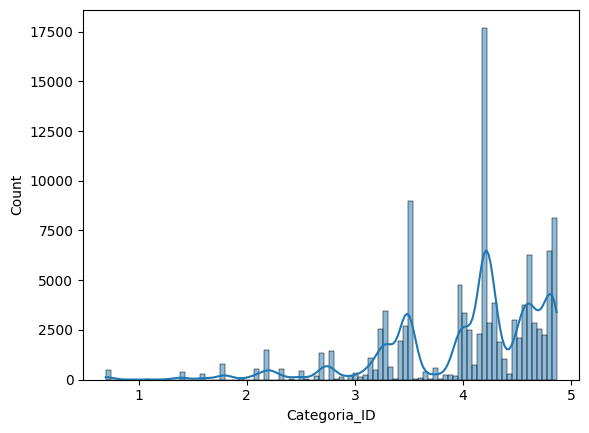

In [81]:
sns.histplot(np.log1p(df['Categoria_ID']), kde=True)

## Ahora si analicemos los datos y su comportamiento por tipo de producto, categoria, proveedor, coste de compra y precio de venta durante los años 2021 y 2022.

In [83]:
products_groupby =df.groupby(["Tipo_producto", 'Categoria_principal','Proveedor_producto','Nombre_producto'],as_index=True).agg({
    k: ['mean','std','median']for k in [
        'Coste_compra']})
products_groupby

Coste_compra  \
                                                                                                                                                mean   
Tipo_producto Categoria_principal Proveedor_producto                                 Nombre_producto                                                   
Convencional  Droguería,          (ALIECO) ALIECO S.L.                               Filtros para té de papel Lebensbaum 100 ud             1.800000   
                                  (BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.          Chupete forma natural ovalado Goldi (>6 meses)         2.280000   
                                                                                     Cuchara de cocina de madera europea                    1.860000   
                                                                                     Cuchillo de cocina 12 cm mango de boj Pallarès ...     7.133750   
                                                                                     Cuchillo de cocina 18 cm mango de olivo Pallarè...     7.280000   
...                                                                                                                                              ...   
Eco           Seco                (antigua LA FINESTRA SUL CIELO) BIOTOBIO IBÉRIC... Vinagre de arroz La Finestra sul cielo 500 ml          4.907500   
                                  False                                              Bebida vegetal soja Monsoy 1 L                         1.690000   
                                                                                     Patatas fritas con pimienta bio Añavieja 125 g         1.386111   
                                                                                     Paté remolacha, almendra y maca NaturGreen 125 g       2.400000   
                                                                                     Pimiento del piquillo entero extra Cal valls 165 g     2.762667   

                                                                                                                                                   \
                                                                                                                                              std   
Tipo_producto Categoria_principal Proveedor_producto                                 Nombre_producto                                                
Convencional  Droguería,          (ALIECO) ALIECO S.L.                               Filtros para té de papel Lebensbaum 100 ud          0.000000   
                                  (BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.          Chupete forma natural ovalado Goldi (>6 meses)      0.000000   
                                                                                     Cuchara de cocina de madera europea                 0.000000   
                                                                                     Cuchillo de cocina 12 cm mango de boj Pallarès ...  0.087983   
                                                                                     Cuchillo de cocina 18 cm mango de olivo Pallarè...  0.000000   
...                                                                                                                                           ...   
Eco           Seco                (antigua LA FINESTRA SUL CIELO) BIOTOBIO IBÉRIC... Vinagre de arroz La Finestra sul cielo 500 ml       0.005000   
                                  False                                              Bebida vegetal soja Monsoy 1 L                      0.000000   
                                                                                     Patatas fritas con pimienta bio Añavieja 125 g      0.016262   
                                                                                     Paté remolacha, almendra y maca NaturGreen 125 g    0.000000   
                                                                      

In [84]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_principal',
       'Categoria_main_ID', 'Categoria_producto', 'Categoria_ID',
       'Tipo_producto', 'Tipo_producto_ID', 'Proveedor_producto',
       'Proveedor_ID', 'Coste_compra', 'Fecha_compra', 'Mes_compra',
       'Año_compra'],
      dtype='object')

In [85]:
df.groupby('Categoria_principal').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_57208/2572891308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Categoria_principal').sum()


,Categoria_main_ID,Categoria_ID,Tipo_producto_ID,Proveedor_ID,Coste_compra,Mes_compra,Año_compra
Categoria_principal,,,,,,,
"Droguería,",6519,53786,10404,45056,24841.98,40902,13177062
Fruta,68613,654261,45678,620532,48691.45,149144,46229920
Granel,6696,70548,3290,40297,16435.45,12804,3384180
Librería,415,4150,132,4538,862.20,460,167806
Resto,77624,2370186,60973,1892204,148979.98,255307,78452802
Seco,247842,4391068,69053,1207923,89929.86,262721,83494038


In [86]:
def annot_plot(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False) 
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

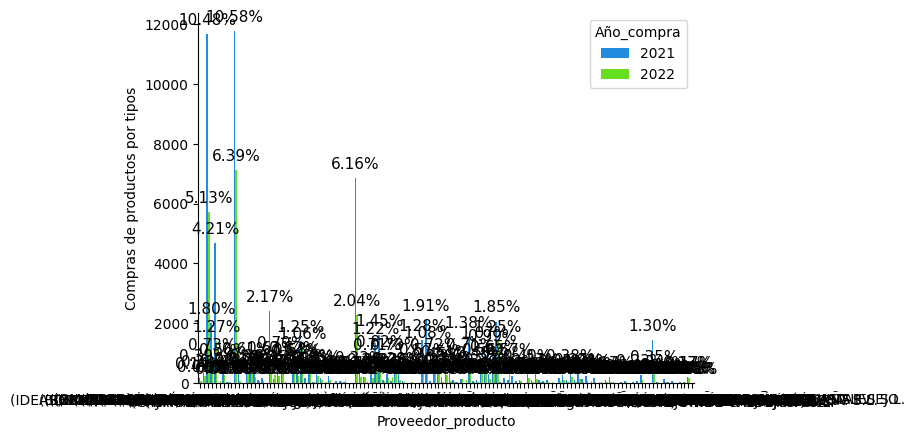

In [89]:
ax = sns.countplot(x="Proveedor_producto",data=df, hue="Año_compra", palette="gist_rainbow_r")
plt.ylabel("Compras de productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

In [90]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_principal',
       'Categoria_main_ID', 'Categoria_producto', 'Categoria_ID',
       'Tipo_producto', 'Tipo_producto_ID', 'Proveedor_producto',
       'Proveedor_ID', 'Coste_compra', 'Fecha_compra', 'Mes_compra',
       'Año_compra'],
      dtype='object')

## En resumen de las compras de La Osa entre en los años 2021 y 2022

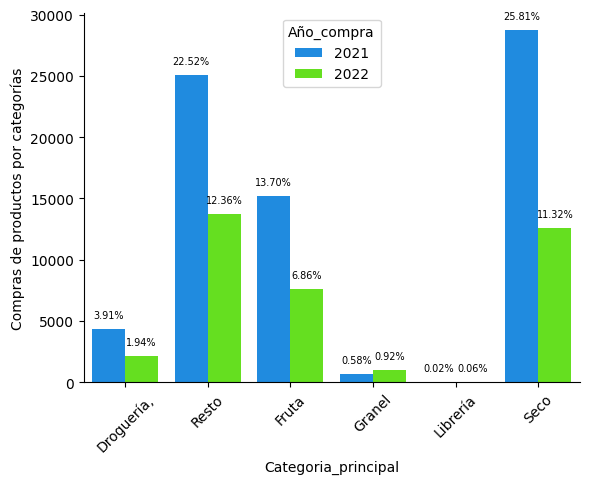

In [121]:
ax = sns.countplot(x="Categoria_principal",data=df, hue="Año_compra", palette="gist_rainbow_r")
plt.ylabel("Compras de productos por categorías")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=7,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    
plt.xticks(rotation=45)
plt.show()

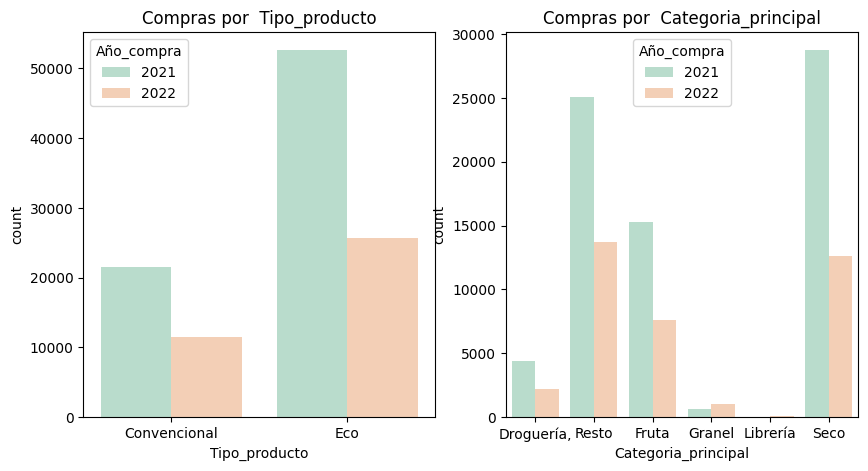

In [120]:
coveriables=["Tipo_producto","Categoria_principal"]
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for i,item in enumerate(coveriables): 
    plt.subplot(1,2,(i+1))
    ax = sns.countplot(x=item,hue="Año_compra",data=df,palette="Pastel2")
    plt.xlabel(str(item))
    plt.title("Compras por  "+str(item))
    i=i+1
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=7,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    #annot_plot(ax)
plt.show()

In [182]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_principal',
       'Categoria_main_ID', 'Categoria_producto', 'Categoria_ID',
       'Tipo_producto', 'Tipo_producto_ID', 'Proveedor_producto',
       'Proveedor_ID', 'Coste_compra', 'Fecha_compra', 'Mes_compra',
       'Año_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

Text(0.5, 1.0, 'Compras de categorias de productos por mes')

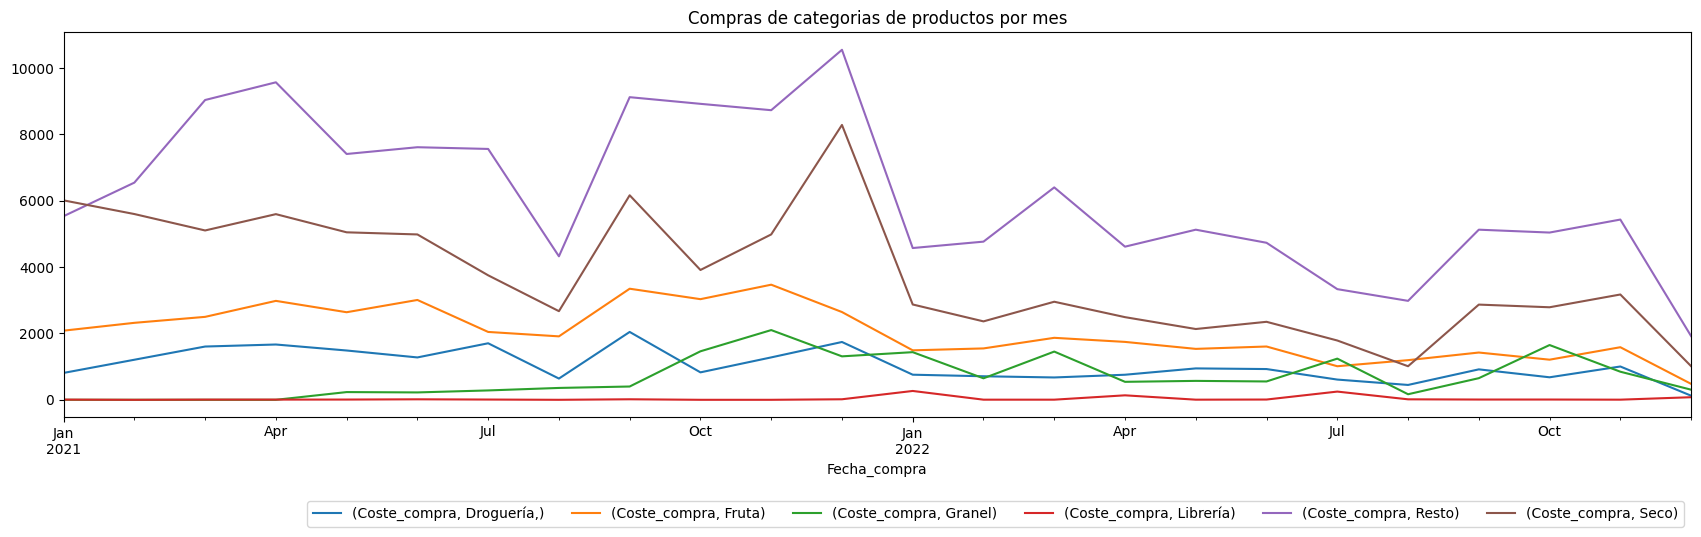

In [95]:
product_type_sales_per_month = df.groupby(['Fecha_compra', 'Categoria_principal']).aggregate({'Coste_compra': 'sum'}).unstack().resample('1M').sum()
product_type_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("Compras de categorias de productos por mes")

Text(0.5, 1.0, 'Compras de productos convencionales o ecológicos por mes')

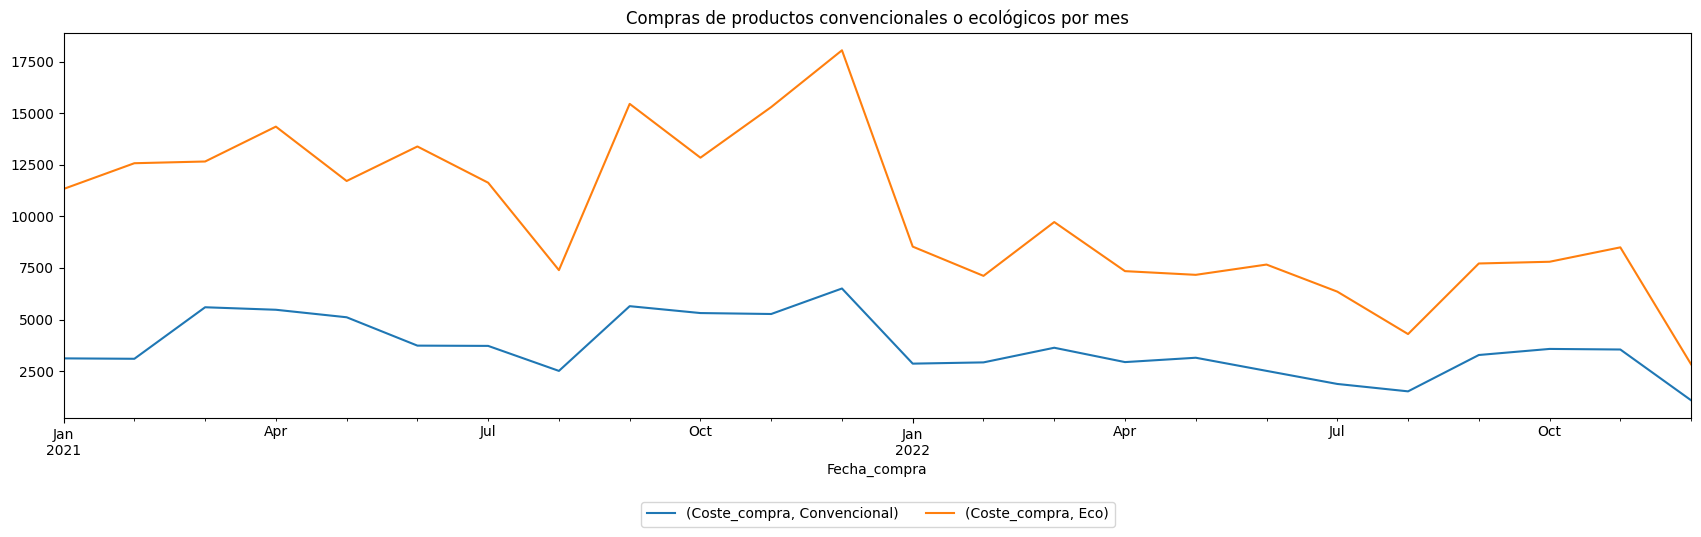

In [107]:
product_type_sales_per_month = df.groupby(['Fecha_compra', 'Tipo_producto']).aggregate({'Coste_compra': 'sum'}).unstack().resample('1M').sum()
product_type_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.65, -0.2), ncol=6)
plt.title("Compras de productos convencionales o ecológicos por mes")

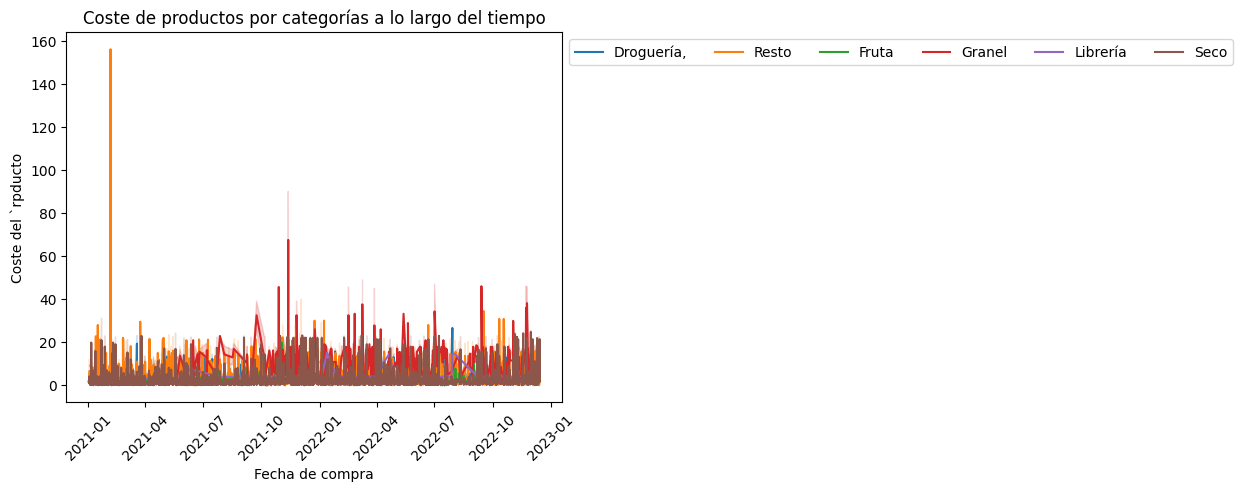

In [111]:
# Utilizando seaborn
sns.lineplot(x='Fecha_compra', y='Coste_compra', data=df, hue='Categoria_principal')
plt.xlabel('Fecha de compra')
plt.ylabel('Coste del `rpducto')
plt.xticks(rotation=45)
plt.title('Coste de productos por categorías a lo largo del tiempo')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [110]:
plt.scatter(df['Fecha_compra'], df['Nombre_producto'])
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste de productos en 2021 y 2022')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 